In [ ]:
#This cell imports the main Python libraries used 
# for data analysis and visualization — NumPy and Pandas for handling data, Matplotlib and Seaborn for plotting, and it also hides unnecessary warning messages to keep the output clean.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#This cell loads the Galton Family Heights dataset from the given file path into a pandas DataFrame named df
# then displays the first six rows to preview the data.
df = pd.read_csv('/Users/hatemelgenedy/Desktop/AI and Data Science Microsoft course/Galton_Family_Heights.csv')
df.head(6)

,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1
5,75.5,66.5,72.5,1


In [ ]:
#This cell displays a summary of the dataset’s structure, including column names, data types, number of non-null values, and the total number of entries — 
# helping to check for missing data or data type issues.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Father_height  934 non-null    float64
 1   Mother_height  934 non-null    float64
 2   Child_height   934 non-null    float64
 3   gender         934 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 29.3 KB


In [ ]:
#This cell shows the dimensions of the dataset — the number of rows and columns — helping you understand how many records and features are in the DataFrame.
df.shape

(934, 4)

In [ ]:
#This cell lists the data type of each column (e.g., float, int, object), helping you identify which columns are numeric, categorical, or other types for further analysis.
df.dtypes

Father_height    float64
Mother_height    float64
Child_height     float64
gender             int64
dtype: object

In [122]:
#his cell identifies and separates columns in the dataset by their data types — numeric, categorical, boolean, and datetime — then prints each list.
#It helps you understand what kinds of data  working with for analysis or preprocessing.
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
bool_cols = df.select_dtypes(include="bool").columns
dt_cols   = df.select_dtypes(include=["datetime", "datetimetz"]).columns

print("Numeric:", list(num_cols))
print("Categorical:", list(cat_cols))
print("Boolean:", list(bool_cols))
print("Datetime:", list(dt_cols))

Numeric: ['Father_height', 'Mother_height', 'Child_height', 'gender', 'Midparent_height']
Categorical: []
Boolean: []
Datetime: []


In [ ]:
#This cell installs the ydata_profiling library, 
# which is used to automatically generate a detailed exploratory data analysis (EDA) report —
# summarizing data distributions, correlations, and missing values in one step.
!pip install ydata_profiling

In [ ]:
#This cell imports the ProfileReport class from the ydata_profiling library, 
#which allows you to create an automated EDA report for your dataset.
from ydata_profiling import ProfileReport

In [ ]:
#This cell reloads the Galton Family Heights dataset into the DataFrame df and displays the first six rows to confirm that the data was loaded correctly.
df = pd.read_csv('/Users/hatemelgenedy/Desktop/AI and Data Science Microsoft course/Galton_Family_Heights.csv')
df.head(6)

,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1
5,75.5,66.5,72.5,1


In [ ]:
#his cell generates an automated EDA report for the dataset using ProfileReport and saves it as an HTML file named “Galton Family EDA.html” — 
#giving a detailed summary of data patterns, distributions, and correlations.
report = ProfileReport(df , title = 'Galton Family data analysis report')
report.to_file(output_file = 'Galton Family EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 25003.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#The dataset represents Father height , Mother height , Child height , Gender

In [ ]:
#This cell checks for missing (null) values in each column of the dataset and displays how many are present — 
# helping to identify if any data cleaning is needed.
df.isnull().sum()

Father_height    0
Mother_height    0
Child_height     0
gender           0
dtype: int64

In [ ]:
#This cell checks for duplicate rows in the dataset and returns a boolean Series indicating which rows are duplicates —
df.duplicated()


0      False
1      False
2      False
3       True
4      False
       ...  
929    False
930    False
931    False
932    False
933    False
Length: 934, dtype: bool

In [ ]:
#This cell shows the number of rows and columns in the dataset — helping to confirm the dataset’s overall size.
df.shape

(934, 4)

In [ ]:
#This cell checks the dataset for duplicate rows and prints the total number found — 
#helping to identify repeated data that might need removal.
duplicates = df . duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 182


In [ ]:
#This cell creates a new column called Midparent_height, which calculates the average of the father’s and mother’s heights — 
#representing the parents’ combined average height.
df["Midparent_height"] = (df["Father_height"] + df["Mother_height"]) / 2


In [ ]:
#This cell calculates the correlation matrix between all numeric columns in the dataset and prints it — showing:
#how strongly each pair of variables (like parent and child heights) are related.
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)


Correlation Matrix:
                   Father_height  Mother_height  Child_height    gender  \
Father_height          1.000000       0.060366      0.266039 -0.024762   
Mother_height          0.060366       1.000000      0.201322 -0.025216   
Child_height           0.266039       0.201322      1.000000  0.716709   
gender                -0.024762      -0.025216      0.716709  1.000000   
Midparent_height       0.752750       0.702546      0.322443 -0.034284   

                  Midparent_height  
Father_height             0.752750  
Mother_height             0.702546  
Child_height              0.322443  
gender                   -0.034284  
Midparent_height          1.000000  


In [ ]:
#This cell computes the correlation matrix for all numeric columns in the dataset — 
#measuring the strength and direction of relationships between numerical variables.
corr = df.corr(numeric_only=True)

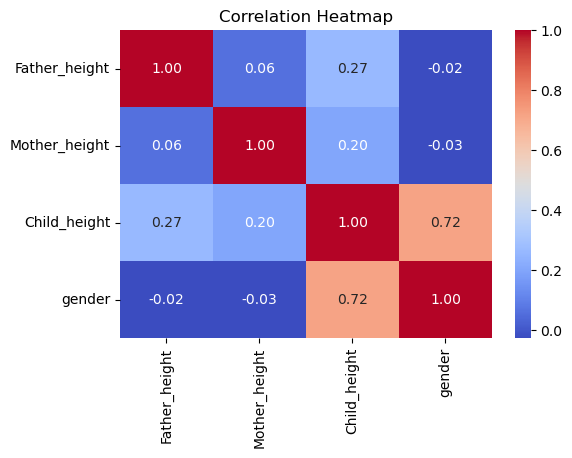

In [ ]:
#This cell visualizes the correlation matrix as a heatmap, where colors represent how strongly variables are related —
#with coolwarm showing positive (red) and negative (blue) correlations.
#%matplotlib inline ensures the plot appears directly in the notebook.
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

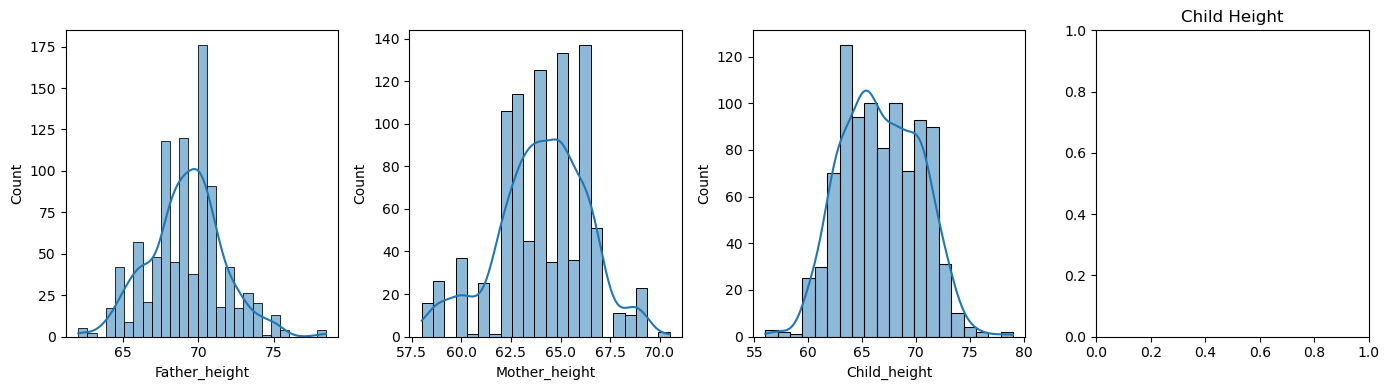

In [ ]:
# X axis represents the height of the father,Mother , Child
# Y axis. represents how many fathers,Mothers , Childerns in this heights
#This cell creates histograms for the heights of fathers, mothers, and children to visualize how each is distributed.
#The kde=True adds a smooth density curve, and plt.tight_layout() ensures the plots don’t overlap for a cleaner display.
fig = plt.figure(figsize=(14, 4))
axes = fig.subplots(1, 4)
sns.histplot(df["Father_height"], kde=True, ax=axes[0])
plt.title("Father Height")

sns.histplot(df["Mother_height"], kde=True, ax=axes[1])
plt.title("Mother Height")

sns.histplot(df["Child_height"], kde=True, ax=axes[2])
plt.title("Child Height")
plt.tight_layout()
plt.show()

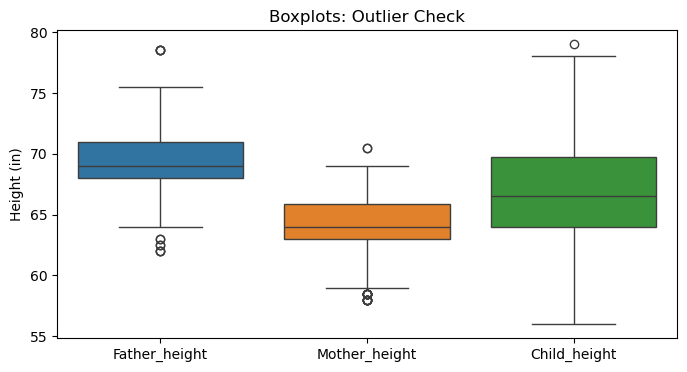

In [ ]:
#Outliers in Father,Mother,Child height
#This cell creates boxplots for father, mother, and child heights to visually identify outliers and compare height distributions — 
#The boxes show data spread, 
#while points outside indicate possible outliers.
fig = plt.figure(figsize=(8, 4))
ax  = fig.subplots()
sns.boxplot(data=df[["Father_height", "Mother_height", "Child_height"]], ax=ax)
plt.title("Boxplots: Outlier Check")
plt.ylabel("Height (in)")
plt.show()


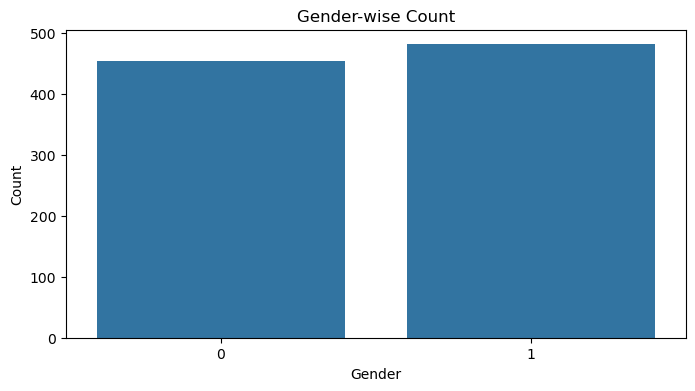

In [ ]:
#Gender count
#This cell creates a count plot showing how many records belong to each gender (e.g., male vs. female).
#It helps visualize the gender distribution in the dataset.
fig = plt.figure(figsize=(8, 4))
ax  = fig.subplots()
sns.countplot(x="gender", data=df, ax=ax)
ax.set_title("Gender-wise Count")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

In [ ]:
#This cell imports key tools from scikit-learn:
#train_test_split to divide data into training and testing sets,
#LinearRegression and RandomForestRegressor to build prediction models,
#r2_score and mean_absolute_error to evaluate model accuracy and error.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
#This cell displays the first few rows of the dataset to confirm that the data is loaded correctly and to get an initial look at the structure and values in the DataFrame.
df.head()

,Father_height,Mother_height,Child_height,gender,Midparent_height
0,78.5,67.0,73.2,1,72.75
1,78.5,67.0,69.2,0,72.75
2,78.5,67.0,69.0,0,72.75
3,78.5,67.0,69.0,0,72.75
4,75.5,66.5,73.5,1,71.00


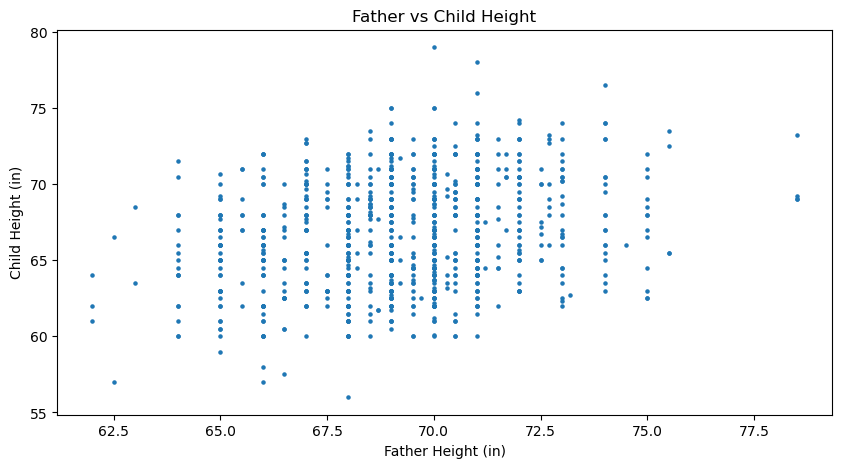

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
#This scatter plot shows the relationship between father height and child height — each point represents one family.
#It helps visualize how a child’s height tends to increase as the father’s height increases, showing a positive correlation.
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
#This cell selects only the numeric columns (father, mother, child heights, and gender) and computes their correlation matrix, showing how strongly these variables are related to each other.
num_cols = ["Father_height", "Mother_height", "Child_height", "gender"]
corr = df[num_cols].corr(numeric_only=True)

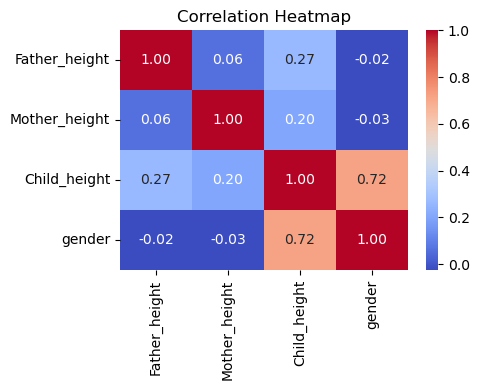

In [ ]:
#This cell creates a heatmap of the numeric columns’ correlation values — visually showing how closely each variable (father, mother, child heights, and gender) is related, using color intensity to represent the correlation strength.
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
#average child height by gender
#This cell groups the data by gender and calculates the average child height for each group, 
#rounding the results to two decimal places — helping compare the mean height between males and females.
avg_by_gender = df.groupby("gender")["Child_height"].mean().round(2)
print("\nAverage Child Height by Gender:\n", avg_by_gender)



Average Child Height by Gender:
 gender
0    64.10
1    69.23
Name: Child_height, dtype: float64


In [ ]:
#Model Building – Child Height Prediction
#This cell defines the features (X) — father’s height, mother’s height, and gender — 
#and the target variable (y), which is the child’s height, preparing the data for model training.
X = df[["Father_height", "Mother_height", "gender"]]
y = df["Child_height"]


In [ ]:
#This cell splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
#This cell initializes a Linear Regression model, which will be used to predict child heights based on the features defined in X.
linreg = LinearRegression()

In [ ]:
# This cell initializes a Random Forest Regressor model, which will be used to predict child heights based on the features defined in X.
rf = RandomForestRegressor(random_state=42, n_estimators=300)

In [ ]:
#This cell fits the Linear Regression model to the training data (X_train and y_train) and also fits the Random Forest Regressor to the same training data, allowing both models to learn the relationships between the features and the target variable.
linreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#This cell uses the trained Linear Regression and Random Forest models to make predictions on the test set (X_test), storing the predicted child heights in y_pred_lr and y_pred_rf respectively.
y_pred_lr = linreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
#This cell evaluates the performance of the Linear Regression model by calculating the R-squared score and Mean Absolute Error (MAE) between the actual child heights (y_test) and the predicted heights (y_pred_lr).
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)


In [ ]:
#This cell evaluates the performance of the Random Forest Regressor model by calculating the R-squared score and Mean Absolute Error (MAE) between the actual child heights (y_test) and the predicted heights (y_pred_rf).
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [ ]:
#This cell prints the R-squared and MAE values for both the Linear Regression and Random Forest models, allowing you to compare their performance in predicting child heights.
print(f"Linear Regression R2: {r2_lr:.3f}, MAE: {mae_lr:.3f}")
print(f"Random Forest R2: {r2_rf:.3f}, MAE: {mae_rf:.3f}")


Linear Regression R2: 0.613, MAE: 1.687
Random Forest R2: 0.590, MAE: 1.670


In [ ]:
#This cell compares the R-squared scores of both models and prints which one performed better in terms of R2, indicating which model explains more variance in the child height data.
best_model_name = "Random Forest" if r2_rf >= r2_lr else "Linear Regression"
print(f"\nBetter model (by R2): {best_model_name}")



Better model (by R2): Linear Regression


#The x-axis is the actual child height from test data.
#The y-axis is the predicted height from  model.
#The blue line is the perfect prediction line — where Actual = Predicted.

#The closer the dots are to the diagonal line, the better the predictions.
#Dots above the line → model predicted too high.
#Dots below the line → model predicted too low.

#The points are mostly near the diagonal, meaning the Linear Regression model predicts well.

#Clear positive trend: as actual height increases, predicted height also increases.


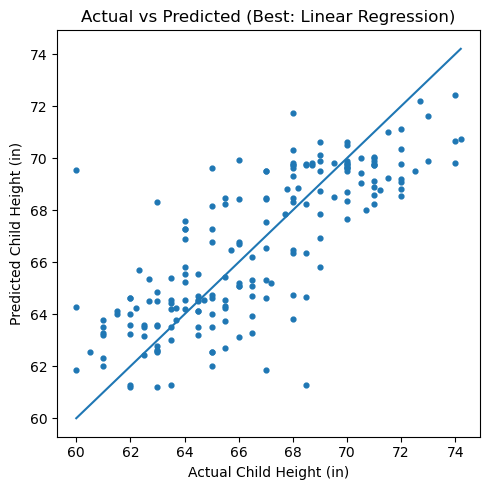

In [ ]:
#Model Interpretation & Visualization
#Plot actual vs predicted (use best model)
#This cell creates a scatter plot comparing the actual child heights (y_test) to the predicted heights from the best-performing model (either Random Forest or Linear Regression).
if best_model_name == "Random Forest":
    y_pred_best = y_pred_rf
else:
    y_pred_best = y_pred_lr

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_best, s=12)
# diagonal reference line
mn, mx = min(y_test.min(), y_pred_best.min()), max(y_test.max(), y_pred_best.max())
plt.plot([mn, mx], [mn, mx])
plt.title(f"Actual vs Predicted (Best: {best_model_name})")
plt.xlabel("Actual Child Height (in)")
plt.ylabel("Predicted Child Height (in)")
plt.tight_layout()
plt.show()

#The x-axis is the index of each test record.
#The y-axis is the residual (error) = Actual – Predicted.

#If residual = 0 → perfect prediction.

#Dots above 0 → model under-predicted (predicted too low).
#Dots below 0 → model over-predicted (predicted too high).

#Most residuals are centered around 0.

#No clear pattern (theyspread randomly above and below the line), which means the model doesn’t have systematic bias.

#A few points are farther away from 0 — those are larger errors or outliers.

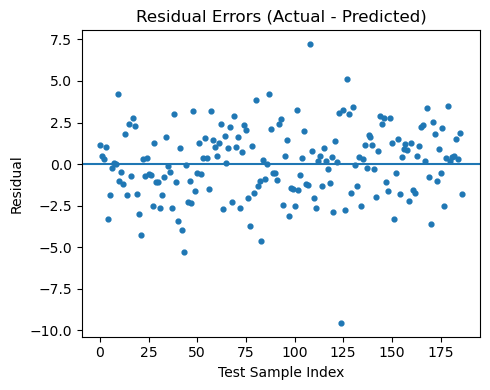

In [ ]:
#This cell calculates the residuals (the difference between actual and predicted values) for the best model and creates a scatter plot of these residuals to check for patterns or biases in the predictions.
residuals = y_test - y_pred_best

plt.figure(figsize=(5,4))
plt.scatter(range(len(residuals)), residuals, s=12)
plt.axhline(0)
plt.title("Residual Errors (Actual - Predicted)")
plt.xlabel("Test Sample Index")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()


#Residual = Actual – Predicted
#X-axis → the size of those residuals (how far off each prediction was)

#Y-axis → how many data points had that size of error


#Bars near 0 → predictions close to actual values.

#Bars farther from 0 → larger errors.

#Most residuals cluster between about –3 and +3 → predictions are close to real heights.


#The peak is near 0, showing the model is centered correctly (no consistent over/under-prediction).


#The shape is almost normal (bell-shaped), which supports Linear Regression assumptions are reasonable.

#A few bars on the far left/right (like –10 or +7) are outliers — these are just a few cases where the model missed badly.


#This histogram shows that most prediction errors are small and evenly spread around zero.


#The model performs well overall, with only a few large outliers.

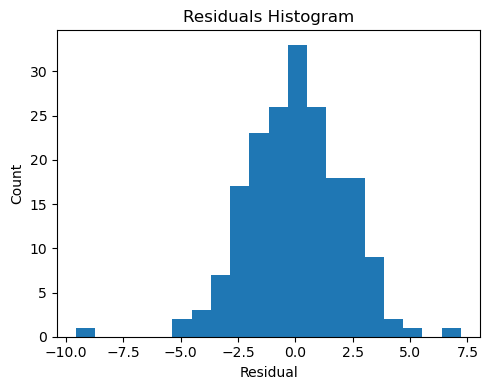

In [ ]:
#This cell creates a histogram of the residuals to visualize their distribution, helping to check if they are normally distributed around zero, which is an assumption of many regression models.
plt.figure(figsize=(5,4))
plt.hist(residuals, bins=20)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
#This cell creates a new DataFrame called comparison that contains the actual child heights (y_test) and the predicted heights (y_pred_best) from the best model, then prints the first 10 rows of this comparison to show how well the predictions match the actual values.
#comparing actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_best
}).reset_index(drop=True)

print("\nFirst 10 — Actual vs Predicted:")
print(comparison.head(10).round(2))


First 10 — Actual vs Predicted:
   Actual  Predicted
0    65.5      64.32
1    72.7      72.21
2    70.0      69.72
3    69.5      68.50
4    64.0      67.29
5    63.0      64.85
6    64.5      64.71
7    65.5      65.44
8    63.5      63.52
9    74.0      69.81
